In [232]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import PublicFunctions as pf

# Read

The data was downloaded from Zillow Research (https://www.zillow.com/research/data/ --> Inventory --> New Listings (Raw, All Homes, Montly View)) as the .csv file given here. Column headers represent the last day of the month, which we simply refer to as the month, i.e., column '2018-1-31' is 'January 2018.'

In [233]:
df = pd.read_csv('Metro_new_listings_uc_sfrcondo_month.csv')
df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022
0,102001,0,United States,country,NaN,327792.0,381284.0,490780.0,529164.0,554878.0,...,315174.0,215175.0,253159.0,284434.0,385837.0,417512.0,440501.0,474768.0,409400.0,361392
1,394913,1,"New York, NY",msa,NY,14997.0,22401.0,23484.0,26845.0,26302.0,...,12043.0,6911.0,9214.0,11516.0,16027.0,16427.0,17057.0,17237.0,14057.0,11642
2,753899,2,"Los Angeles, CA",msa,CA,8274.0,9505.0,10523.0,11052.0,11871.0,...,6591.0,4466.0,6533.0,7619.0,9115.0,9312.0,9413.0,9847.0,8691.0,7464
3,394463,3,"Chicago, IL",msa,IL,8795.0,11937.0,17632.0,17154.0,17315.0,...,8726.0,5380.0,7253.0,8960.0,12644.0,13390.0,13876.0,14605.0,12056.0,10313
4,394514,4,"Dallas, TX",msa,TX,7848.0,8186.0,11131.0,12357.0,12362.0,...,7995.0,5751.0,6202.0,6155.0,8376.0,9647.0,10372.0,12367.0,10742.0,8544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,753929,923,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6
885,394743,924,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,12.0,15.0,7.0,9.0,13.0,7
886,753874,925,"Craig, CO",msa,CO,19.0,25.0,24.0,34.0,51.0,...,14.0,10.0,14.0,9.0,20.0,30.0,33.0,22.0,20.0,28
887,394767,926,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,6.0,8.0,11.0,10.0,18


# Isolate the data for the team

In [234]:
team = 32
row = df.iloc[team]
row

RegionID            394492
SizeRank                32
RegionName    Columbus, OH
RegionType             msa
StateName               OH
                  ...     
4/30/2022           2678.0
5/31/2022           2669.0
6/30/2022           3127.0
7/31/2022           2793.0
8/31/2022             2454
Name: 32, Length: 61, dtype: object

Calculate the monthly averages for years 1 thru 4. 

In [235]:
# 2018
y1 = row[row.keys()[5:17]]
y1avg = y1.mean()
y1avg

2715.1666666666665

In [236]:
y2 = row[row.keys()[17:29]]
y2avg = y2.mean()
y2avg 

2680.4166666666665

In [237]:
y3 = row[row.keys()[29:41]]
y3avg = y3.mean()
y3avg 

2525.0833333333335

In [238]:
y4 = row[row.keys()[41:53]]
y4avg = y4.mean()
y4avg 

2612.5833333333335

# Forecast Using the Decomposition Method

Calculate the seasonal index for each season each year, and then the average (over the two years) for each season.

In [239]:
values = [(y1/y1avg).values,
         (y2/y2avg).values,
         (y3/y3avg).values,
         (y4/y4avg).values]
SI = pd.DataFrame(values, columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], index = ['Year 1', 'Year 2', 'Year 3', 'Year 4'])
SI.loc['Average'] = SI.mean()
SI

,January,February,March,April,May,June,July,August,September,October,November,December
Year 1,0.602173,0.766435,1.081333,1.184458,1.430483,1.306365,1.277638,1.240071,0.972316,0.989994,0.712295,0.436437
Year 2,0.703622,0.700637,1.040137,1.180413,1.422540,1.281890,1.244210,1.189740,1.033421,1.042002,0.699518,0.461868
Year 3,0.767895,0.832448,1.056203,0.911653,1.095409,1.188476,1.306096,1.203129,1.182139,1.146893,0.756807,0.552853
Year 4,0.706963,0.630028,0.911741,1.133361,1.195369,1.329336,1.416988,1.247424,1.114223,1.074798,0.760933,0.478836
Average,0.695163,0.732387,1.022354,1.102471,1.285950,1.276517,1.311233,1.220091,1.075525,1.063422,0.732388,0.482499


Deseasonalize the data.

In [240]:
y_dm = np.array(row[5:53])
y_dm[0] = y_dm[0]/SI.loc['Average']['January']
y_dm[1] = y_dm[1]/SI.loc['Average']['February']
y_dm[2] = y_dm[2]/SI.loc['Average']['March']
y_dm[3] = y_dm[3]/SI.loc['Average']['April']
y_dm[4] = y_dm[4]/SI.loc['Average']['May']
y_dm[5] = y_dm[5]/SI.loc['Average']['June']
y_dm[6] = y_dm[6]/SI.loc['Average']['July']
y_dm[7] = y_dm[7]/SI.loc['Average']['August']
y_dm[8] = y_dm[8]/SI.loc['Average']['September']
y_dm[9] = y_dm[9]/SI.loc['Average']['October']
y_dm[10] = y_dm[10]/SI.loc['Average']['November']
y_dm[11] = y_dm[11]/SI.loc['Average']['December']
y_dm[12] = y_dm[12]/SI.loc['Average']['January']
y_dm[13] = y_dm[13]/SI.loc['Average']['February']
y_dm[14] = y_dm[14]/SI.loc['Average']['March']
y_dm[15] = y_dm[15]/SI.loc['Average']['April']
y_dm[16] = y_dm[16]/SI.loc['Average']['May']
y_dm[17] = y_dm[17]/SI.loc['Average']['June']
y_dm[18] = y_dm[18]/SI.loc['Average']['July']
y_dm[19] = y_dm[19]/SI.loc['Average']['August']
y_dm[20] = y_dm[20]/SI.loc['Average']['September']
y_dm[21] = y_dm[21]/SI.loc['Average']['October']
y_dm[22] = y_dm[22]/SI.loc['Average']['November']
y_dm[23] = y_dm[23]/SI.loc['Average']['December']
y_dm[24] = y_dm[24]/SI.loc['Average']['January']
y_dm[25] = y_dm[25]/SI.loc['Average']['February']
y_dm[26] = y_dm[26]/SI.loc['Average']['March']
y_dm[27] = y_dm[27]/SI.loc['Average']['April']
y_dm[28] = y_dm[28]/SI.loc['Average']['May']
y_dm[29] = y_dm[29]/SI.loc['Average']['June']
y_dm[30] = y_dm[30]/SI.loc['Average']['July']
y_dm[31] = y_dm[31]/SI.loc['Average']['August']
y_dm[32] = y_dm[32]/SI.loc['Average']['September']
y_dm[33] = y_dm[33]/SI.loc['Average']['October']
y_dm[34] = y_dm[34]/SI.loc['Average']['November']
y_dm[35] = y_dm[35]/SI.loc['Average']['December']
y_dm[36] = y_dm[36]/SI.loc['Average']['January']
y_dm[37] = y_dm[37]/SI.loc['Average']['February']
y_dm[38] = y_dm[38]/SI.loc['Average']['March']
y_dm[39] = y_dm[39]/SI.loc['Average']['April']
y_dm[40] = y_dm[40]/SI.loc['Average']['May']
y_dm[41] = y_dm[41]/SI.loc['Average']['June']
y_dm[42] = y_dm[42]/SI.loc['Average']['July']
y_dm[43] = y_dm[43]/SI.loc['Average']['August']
y_dm[44] = y_dm[44]/SI.loc['Average']['September']
y_dm[45] = y_dm[45]/SI.loc['Average']['October']
y_dm[46] = y_dm[46]/SI.loc['Average']['November']
y_dm[47] = y_dm[47]/SI.loc['Average']['December']
print("y = ",y_dm)

y =  [2351.9651278320257 2841.393653863127 2871.805059650878 2917.0827216032526
 3020.334527786027 2778.6553033196856 2645.6018562385684 2759.629918834335
 2454.615496814374 2527.6890648725034 2640.6762465424877 2455.964620203485
 2713.0313340007347 2564.2178192959886 2727.041044382373
 2869.9159611793193 2965.1224393532757 2691.6999216821087
 2543.407953460832 2613.739177654498 2575.486714460537 2626.426918969086
 2560.1178708723705 2565.8094513180713 2789.2724054228124
 2870.0670160597274 2608.6866805479876 2088.036201844119 2150.938543732274
 2350.928831480794 2515.1902340371284 2489.9779309232877
 2775.3891128753435 2723.284052035257 2609.27213399312 2893.2714006785363
 2656.9294135203377 2247.445436933545 2329.918137632286 2685.7841849089646
 2428.55425599273 2720.6850488946343 2823.2972245013493 2671.1119410398273
 2706.585496676759 2640.532326697169 2714.407641223612 2592.7525231008945]


Perform simple linear regression to extract trend.

In [241]:
model_dm = LinearRegression()
x = np.arange(1, 49).reshape((-1, 1))
model_dm.fit(x,y_dm)
r_sq_dm = model_dm.score(x, y_dm)
print('Coefficient of determination:', r_sq_dm)
intercept_dm = model_dm.intercept_
print('Intercept:', intercept_dm)
slope_dm = model_dm.coef_[0]
print('Slope:', slope_dm)

Coefficient of determination: 0.03869487932998339
Intercept: 2701.7785199288774
Slope: -2.8245072939146927


Extend the trend to year 5. 

In [242]:
#The forecast calculation is explicitly stated here but you can use sklearn's Predict function, as well (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
forecast_dm = []
for t in range(49,61):
    forecast_dm.append(intercept_dm + t*slope_dm)
forecast_dm

[2563.3776625270575,
 2560.5531552331427,
 2557.728647939228,
 2554.9041406453134,
 2552.0796333513986,
 2549.2551260574837,
 2546.4306187635693,
 2543.6061114696545,
 2540.78160417574,
 2537.9570968818252,
 2535.1325895879104,
 2532.308082293996]

Seasonalize year 5 forecasts.

In [243]:
forecast_dm[0] = forecast_dm[0]*SI.loc['Average']['January']
forecast_dm[1] = forecast_dm[1]*SI.loc['Average']['February']
forecast_dm[2] = forecast_dm[2]*SI.loc['Average']['March']
forecast_dm[3] = forecast_dm[3]*SI.loc['Average']['April']
forecast_dm[4] = forecast_dm[4]*SI.loc['Average']['May']
forecast_dm[5] = forecast_dm[5]*SI.loc['Average']['June']
forecast_dm[6] = forecast_dm[6]*SI.loc['Average']['July']
forecast_dm[7] = forecast_dm[7]*SI.loc['Average']['August']
forecast_dm[8] = forecast_dm[8]*SI.loc['Average']['September']
forecast_dm[9] = forecast_dm[9]*SI.loc['Average']['October']
forecast_dm[10] = forecast_dm[10]*SI.loc['Average']['November']
forecast_dm[11] = forecast_dm[11]*SI.loc['Average']['December']
forecast_dm

[1781.9662496845758,
 1875.3160473894864,
 2614.9028761940035,
 2816.708506572427,
 3281.847492305017,
 3254.1668343400074,
 3338.963417968758,
 3103.431267673706,
 2732.673790957985,
 2698.919250482436,
 1856.701075977256,
 1221.835629403228]

# Forecast Using Multiple Linear Regression

Populate independent variables

In [244]:
x = np.arange(1, 49).reshape((-1, 1))#Must change this to add the dummy binary variables.
x2 = [np.append(v, np.zeros(11, dtype=np.int8)) for v in x]
for i, x in enumerate(x2):
    if(i%12 == 0): 
        continue
    x[(i%12)] = 1


Run multiple linear regression.

In [245]:
model_mlr = LinearRegression()
model_mlr.fit(x2,np.array(row[5:53])) #Must change this. Basically, you need to extend the simple linear regression model to take multiple independent variables. You are referred to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html for the documentation of the package we use for this purpose. Make sure you use the correct y values, too.

LinearRegression()

Calculate the forecasts.

In [246]:
ex = np.arange(49, 61).reshape((-1, 1))#Must change this to add the dummy binary variables.
newx = [np.append(v, np.zeros(11, dtype=np.int8)) for v in ex]
for i, x in enumerate(newx):
    if(i%12 == 0): 
        continue
    x[(i%12)] = 1

forecast_mlr = model_mlr.predict(newx)
forecast_mlr

array([1710.97916667, 1810.97916667, 2577.47916667, 2794.97916667,
       3280.72916667, 3248.47916667, 3335.22916667, 3097.47916667,
       2710.72916667, 2680.47916667, 1811.22916667, 1151.72916667])

# Calculate Forecast Accuracy

In [247]:
actual_Year5 = []
for t in range(53,61):
    actual_Year5.append(row[t])
actual_Year5

[1450.0, 1439.0, 2068.0, 2678.0, 2669.0, 3127.0, 2793.0, 2454]

In [248]:
deviation_dm = []
deviation_mlr = []
for t in range(8):
    deviation_dm.append(forecast_dm[t] - actual_Year5[t]) 
    deviation_mlr.append(forecast_mlr[t] - actual_Year5[t]) 
MAD_dm = pf.CalculateMeanAbsoluteDeviation(deviation_dm)
MAD_mlr = pf.CalculateMeanAbsoluteDeviation(deviation_mlr)
print("MAD_DM:",MAD_dm)
print("MAD_MLR:",MAD_mlr)

MAD_DM: 423.66283651599764
MAD_MLR: 397.2916666666672


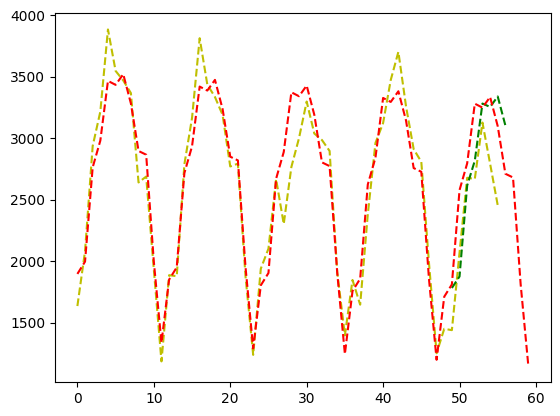

In [249]:
plot = plt.figure()
plt.subplot().plot(range(56), row[5:65], 'y--')
plt.subplot().plot(range(49,57), forecast_dm[:8], 'g--')
plt.subplot().plot(range(60), model_mlr.predict(np.concatenate((x2, newx))), 'r--')

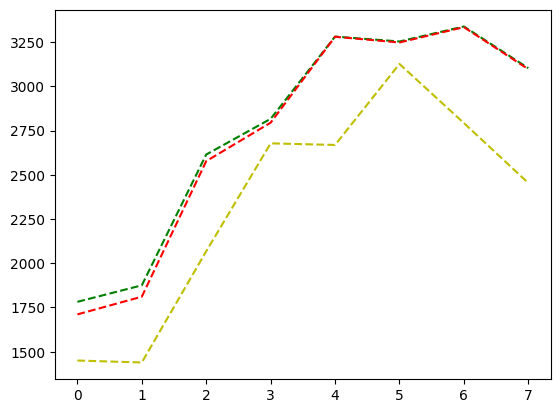

In [250]:
plot = plt.figure()
plt.subplot().plot(range(8), actual_Year5, 'y--')
plt.subplot().plot(range(8), forecast_dm[:8], 'g--')
plt.subplot().plot(range(8), forecast_mlr[:8], 'r--')

# Bonus Part

Adding unemployment rate for each month as another factor in multiple linear regression


In [251]:
df = pd.read_csv('metro_san_antonio.csv')
df.columns = df.iloc[9]
df.drop(df.index[:10], axis=0, inplace=True)
vals = df[72:128]
unemployment = pd.to_numeric(vals['unemployment']).values  


## Add new data to x values

We normalized the independent variables with a scalar to normalize the effect of each variable (if we didn't do this unemployment rate would be weighted too much and the prediction was too off)

In [252]:
from sklearn.preprocessing import StandardScaler
x = np.arange(1, 49).reshape((-1, 1))
x2 = [np.append(v, np.zeros(11, dtype=np.int8))for v in x]
x2 = [np.append(v, unemployment[i])for i, v in enumerate(x2)]

for i, x in enumerate(x2):
    if(i%12 == 0): 
        continue
    x[(i%12)] = 1

sc_x = StandardScaler()
x2 = sc_x.fit_transform(x2)

In [253]:
model_unem = LinearRegression()
model_unem.fit(x2,np.array(row[5:53])) 

LinearRegression()

In [254]:
#months 49-56 prediction

ex = np.arange(49, 49+8).reshape((-1,1))
newx = [np.append(v, np.zeros(11, dtype=np.int8)) for v in ex] 
newx = [np.append(v, unemployment[i])for i, v in enumerate(newx,48)]
for i, x in enumerate(newx): 
    if(i%12 == 0): 
        continue 
    x[(i%12)] = 1 
newx = sc_x.fit_transform(newx)
forecast_unem = model_unem.predict(newx)

forecast_unem

array([1446.01793765, 1542.8676991 , 2559.23766633, 2943.13641845,
       3291.64565169, 3069.63807646, 3195.16369518, 3018.79285513])

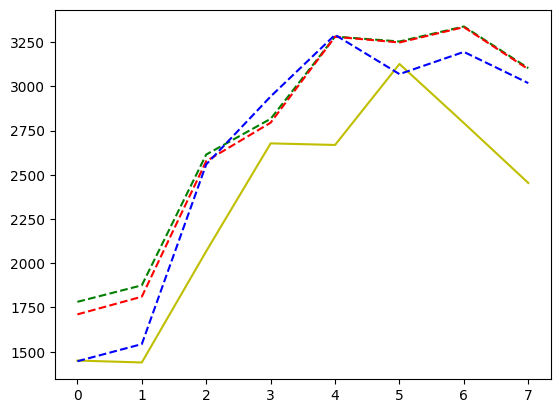

In [255]:
plot = plt.figure()
plt.subplot().plot(range(8), actual_Year5, 'y-')
plt.subplot().plot(range(8), forecast_dm[:8], 'g--')
plt.subplot().plot(range(8), forecast_mlr[:8], 'r--')
plt.subplot().plot(range(8), forecast_unem[:8], 'b--')

In [256]:
deviation_mlr_unem = [f - actual_Year5[t] for t,f in enumerate(forecast_unem)]


MAD_unem = pf.CalculateMeanAbsoluteDeviation(deviation_mlr_unem)
print("MAD_DM:",MAD_dm)
print("MAD_MLR:",MAD_mlr)
print("MAD_MLR with Unemployment:",MAD_unem)

MAD_DM: 423.66283651599764
MAD_MLR: 397.2916666666672
MAD_MLR with Unemployment: 313.8984964726543
